In [1]:
binary6typ = 'Ongoing_adv_gent'
model_name = '1_FQ_Binaries_Ongoing_adv_gent'

# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [2]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

In [3]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [4]:
(list(data.columns)), data.shape

(['id',
  'Place Name',
  'Rating',
  'Checkins',
  'Users',
  'Visits',
  'Pricing',
  'Type',
  'Category',
  'Class',
  'geometry'],
 (106287, 11))

In [5]:
data.head(1)

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,geometry
0,50ad0afce4b0b4a7430e2268,Terry's Wine Shop,8.8,294,217,337,None,Wine Shop,Consumption,Optional,POINT (-74.00034036700906 40.73518392010902)


In [6]:
list(data.columns)[-4:-1]

['Type', 'Category', 'Class']

In [7]:
X_dummies = data[list(data.columns)[-4:-1]]
print(X_dummies.shape)
X_dummies = pd.get_dummies(X_dummies)
Fq_dummies = pd.concat([data, X_dummies], axis=1, join='inner')  
Fq_dummies.shape

(106287, 3)


(106287, 716)

# Census Tract shapefile
- imports the Census Tract shapefile


In [8]:
# create the directory for shapefiles and set the environmental variable to it

#masterdata = os.getenv("Master")
#if masterdata is None:
#    os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#    masterdata = os.getenv("Master")
#    print("Warning: Master environmental variable not found and set by code, please review!")
#print("Master: {}".format(masterdata))

In [9]:
# create the directory for shapefiles and set the environmental variable to it

# masterdata = os.getenv("Master")
# if masterdata is None:
#     os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#     masterdata = os.getenv("Master")
#     print("Warning: Master environmental variable not found and set by code, please review!")
# print("Master: {}".format(masterdata))
# def getGeoDataFrameFromShpFileZipUrl(url):
#     '''
#     This function downloads the zip file, unzips it into the dorectory 
#     pointed to by PUIdata environment variable. Then it 
#     reads it into a gepandas dataframe
#     '''
    
#     folderName = 'shape'+ \
#         str(len(os.listdir(os.getenv('TaxiData')))+1)
#     os.makedirs(os.getenv('Master') + '/' + folderName)
#     urlretrieve(url, "region.zip")
#     os.system('unzip -d $Master'+'/'+folderName+' region.zip')
#     filenames = [f for f in os.listdir(os.getenv('Master') + '/' + folderName) if f.endswith('.shp') ]
#     shapeFile = filenames[0]
#     shapeFilePath = os.getenv('Master') + '/' + folderName + '/' + shapeFile
#     return gpd.GeoDataFrame.from_file(shapeFilePath)


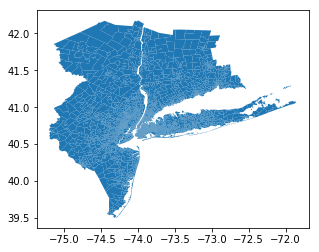

In [10]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [11]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [12]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

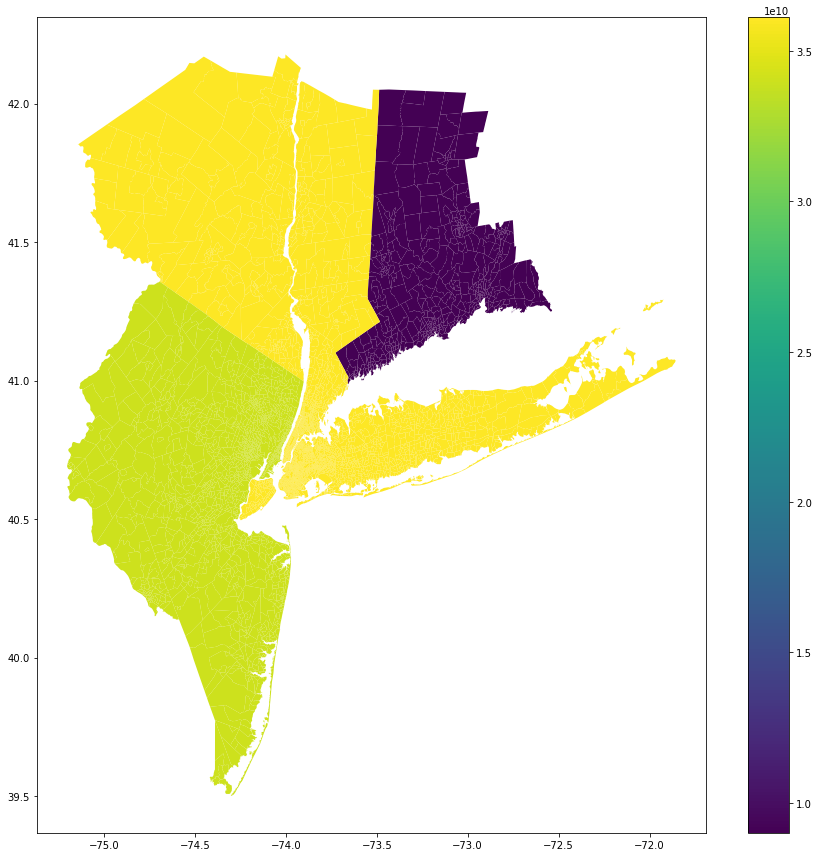

In [13]:
figure, ax = plt.subplots(figsize=(15, 15))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

# Typologies
- import raw Typology file with Census data 'NY_final_data_for_typologies_1.19.19.csv'
- merges Typologies with the new Binary typologies
- map topologies

In [14]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
len(Typologiesgdp.columns)

82

In [15]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,Type_1.19
0,9.001010e+09,VHI - Super Gentrification or Exclusion
1,9.001010e+09,VHI - Super Gentrification or Exclusion
2,9.001010e+09,VHI - Super Gentrification or Exclusion
3,9.001010e+09,VHI - Super Gentrification or Exclusion
4,9.001010e+09,VHI - Super Gentrification or Exclusion


In [16]:
Binaries=pd.read_csv('./Data/NEW_6_BINARIES_ALL.csv')
len(Binaries.columns), Binaries.shape
Binaries.drop(columns = 'Unnamed: 0', inplace=True)
Binaries.head()

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34013021601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003031100
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003036200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017003500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017015500


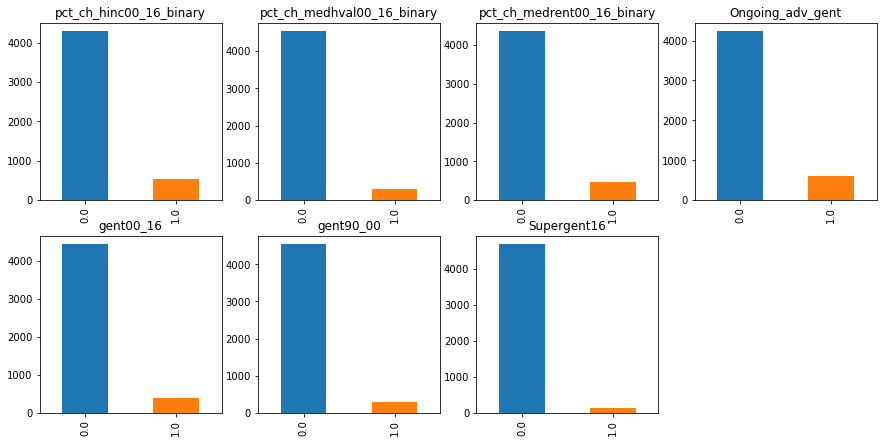

In [17]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Binaries[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Binaries[column].value_counts()/Binaries[column].value_counts().sum()

In [18]:
Typologiesgdp = Typologiesgdp.merge(Binaries, on= 'GEOID')
Typologiesgdp.shape

(4829, 10)

In [19]:
Typologiesgdp.isnull().sum()


GEOID                         0
Type_1.19                     0
pct_ch_percol00_16_binary     0
pct_ch_hinc00_16_binary       0
pct_ch_medhval00_16_binary    0
pct_ch_medrent00_16_binary    0
Ongoing_adv_gent              0
gent00_16                     0
gent90_00                     0
Supergent16                   0
dtype: int64

In [20]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail(1)

,GEOID,geometry,Type_1.19,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
4828,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",MHI - Stable or Early Stage of Exclusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 11)


(4829, 11)

# LOAD FOURSQUARE DATA

In [22]:
# Neighbours
X_foursquare_neighbours = pd.read_csv('Improve_Features/X_foursquare-neighbours.csv')
print(X_foursquare_neighbours.shape,X_foursquare_neighbours.columns)
X_foursquare_neighbours.drop(['Unnamed: 0'],axis =1, inplace=True)
cols_neighbours = []
for column in X_foursquare_neighbours.columns:
    if '_sum10' in column:
        cols_neighbours.append(column)
cols_neighbours = cols_neighbours + ['GEOID']

(3009, 2130) Index(['Unnamed: 0', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown_sum5', 'Category_Unknown_sum10', 'Class__sum5',
       'Class__sum10', 'Class_Necessary_sum5', 'Class_Necessary_sum10',
       'Class_Optional_sum5', 'Class_Optional_sum10', 'GEOID', 'geometry'],
      dtype='object', length=2130)


In [23]:
# Distances
X_foursquare_high = pd.read_csv('Improve_Features/X_foursquare-distances_high.csv')

print(X_foursquare_high.shape,X_foursquare_high.columns)
cols_high = []
for column in X_foursquare_high.columns:
    if 'distance' in column:
        cols_high.append(column)
cols_high = cols_high + ['GEOID']
cols_high

(3009, 724) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant', 'distance_to_Type_Café',
       'distance_to_Type_Wine Bar', 'distance_to_Type_Cocktail Bar',
       'distance_to_Type_Beer Garden'],
      dtype='object', length=724)


['distance_to_Type_American Restaurant',
 'distance_to_Type_Juice Bar',
 'distance_to_Type_Coffee Shop',
 'distance_to_Type_Deli / Bodega',
 'distance_to_Type_Food Truck',
 'distance_to_Type_Salad Place',
 'distance_to_Type_New American Restaurant',
 'distance_to_Type_Gastropub',
 'distance_to_Type_Steakhouse',
 'distance_to_Type_French Restaurant',
 'distance_to_Type_Café',
 'distance_to_Type_Wine Bar',
 'distance_to_Type_Cocktail Bar',
 'distance_to_Type_Beer Garden',
 'GEOID']

In [24]:
X_foursquare_low = pd.read_csv('Improve_Features/X_foursquare-distances_low.csv')
print(X_foursquare_low.shape,X_foursquare_low.columns)
cols_low = []
for column in X_foursquare_low.columns:
    if 'distance' in column:
        cols_low.append(column)
cols_low = cols_low + ['GEOID']
cols_low

(3009, 720) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Typologies', 'geometry', 'distance_to_Type_Latin American Restaurant',
       'distance_to_Type_Bar', 'distance_to_Type_Donut Shop',
       'distance_to_Type_Taco Place', 'distance_to_Type_Fast Food Restaurant',
       'distance_to_Type_Spanish Restaurant',
       'distance_to_Type_Fried Chicken Joint',
       'distance_to_Type_Caribbean Restaurant'],
      dtype='object', length=720)


['distance_to_Type_Latin American Restaurant',
 'distance_to_Type_Bar',
 'distance_to_Type_Donut Shop',
 'distance_to_Type_Taco Place',
 'distance_to_Type_Fast Food Restaurant',
 'distance_to_Type_Spanish Restaurant',
 'distance_to_Type_Fried Chicken Joint',
 'distance_to_Type_Caribbean Restaurant',
 'GEOID']

In [25]:
# Distances- numeric 
X_foursquare_numeric = pd.read_csv('Improve_Features/X_foursquare-distances_numeric.csv')
print(X_foursquare_numeric.shape,X_foursquare_numeric.columns)
cols_numeric = []
for column in X_foursquare_numeric.columns:
    if 'distance' in column:
        cols_numeric.append(column)
cols_numeric = cols_numeric + ['GEOID']
cols_numeric
# Distances- cats 
X_foursquare_cats1 = pd.read_csv('Improve_Features/X_foursquare-distances_cats.csv')
print(X_foursquare_cats1.shape,X_foursquare_cats1.columns)
cols_cats1 = []
for column in X_foursquare_cats1.columns:
    if 'distance' in column:
        cols_cats1.append(column)
cols_cats1 = cols_cats1 + ['GEOID']
cols_cats1
# Distances- class
X_foursquare_class = pd.read_csv('Improve_Features/X_foursquare-distances_class.csv')
print(X_foursquare_class.shape,X_foursquare_cats1.columns)
cols_class = []
for column in X_foursquare_class.columns:
    if 'distance' in column:
        cols_class.append(column)
cols_class = cols_class + ['GEOID']
cols_class

(3009, 716) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional',
       'Typologies', 'geometry', 'distance_to_Rating', 'distance_to_Checkins',
       'distance_to_Users', 'distance_to_Visits'],
      dtype='object', length=716)
(3009, 723) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Category_Consumption', 'distance_to_Category_Education',
       'distance_to_Category_Income', 'distance_to_Category_Leisure',
       'distance_to_Category_Mobility', 'distance_to_Category_Nutrition',
       'distance_to_Category_Personal care', 'distance_to_Category_Social',
       'distance_to_Category_Taking care', 'dista

['distance_to_Class_',
 'distance_to_Class_Necessary',
 'distance_to_Class_Optional',
 'GEOID']

In [26]:
X_foursquare_neighbours = X_foursquare_neighbours.loc[:,cols_neighbours]
X_foursquare_high = X_foursquare_high.loc[:,cols_high]
X_foursquare_class = X_foursquare_class.loc[:,cols_class]
X_foursquare_cats1 = X_foursquare_cats1.loc[:,cols_cats1]
X_foursquare_numeric = X_foursquare_numeric.loc[:,cols_numeric]
X_foursquare_low = X_foursquare_low.loc[:,cols_low]
# X_foursquare_person = X_foursquare_person.loc[:,cols_person]
# X_foursquare_income = X_foursquare_income.loc[:,cols_income]

In [27]:
# X_foursquare_low.shape, X_foursquare_person.shape
print(X_foursquare_high.shape)

(3009, 15)


In [28]:
X_foursquare_data_sjoined = pd.read_csv('./data_sjoined_sum_merged.csv')
X_foursquare_data_sjoined.drop(columns=['Unnamed: 0','Typologies'],inplace=True)
print(X_foursquare_data_sjoined.shape)
print(X_foursquare_data_sjoined.shape,X_foursquare_data_sjoined.columns)
cols_datasjoined = []
for column in X_foursquare_data_sjoined.drop(columns=['geometry']).columns:
    if 'Type' not in column:
        cols_datasjoined.append(column)
cols_datasjoined = cols_datasjoined
cols_datasjoined

(3009, 711)
(3009, 711) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Mobility', 'Category_Nutrition', 'Category_Personal care',
       'Category_Social', 'Category_Taking care', 'Category_Unknown', 'Class_',
       'Class_Necessary', 'Class_Optional', 'geometry'],
      dtype='object', length=711)


['GEOID',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Category_Civic',
 'Category_Consumption',
 'Category_Education',
 'Category_Income',
 'Category_Leisure',
 'Category_Mobility',
 'Category_Nutrition',
 'Category_Personal care',
 'Category_Social',
 'Category_Taking care',
 'Category_Unknown',
 'Class_',
 'Class_Necessary',
 'Class_Optional']

In [29]:
X_foursquare_data_sjoined_all = X_foursquare_data_sjoined.drop(columns=['geometry'])

In [30]:
# X_foursquare_data_sjoined_pca = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,7:698]

X_foursquare_data_sjoined_non_type = X_foursquare_data_sjoined.loc[:,cols_datasjoined]
X_foursquare_data_sjoined_non_type.head(1)

,GEOID,Rating,Checkins,Users,Visits,Category_Civic,Category_Consumption,Category_Education,Category_Income,Category_Leisure,Category_Mobility,Category_Nutrition,Category_Personal care,Category_Social,Category_Taking care,Category_Unknown,Class_,Class_Necessary,Class_Optional
0,34003003200,20.0,6591,2767,10611,3.0,7.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,4.0,12.0


In [31]:
# X_foursquare_data_sjoined_other1 = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,698:]
# X_foursquare_data_sjoined_other1.head(1)

In [32]:
# X_foursquare_data_sjoined_other2 = X_foursquare_data_sjoined.drop(columns=['geometry']).iloc[:,:7]
# X_foursquare_data_sjoined_other2.head(1)

# Part II. Modeling


In [33]:
### Combine FQ DATA::

In [34]:
X_foursquare = X_foursquare_high.merge(X_foursquare_neighbours, on='GEOID')
print(X_foursquare.shape)
X_foursquare = X_foursquare.merge(X_foursquare_low, on='GEOID')
print(X_foursquare.shape)
X_foursquare = X_foursquare.merge(X_foursquare_class, on='GEOID')
print(X_foursquare.shape)
X_foursquare = X_foursquare.merge(X_foursquare_numeric, on='GEOID')
print(X_foursquare.shape)
X_foursquare = X_foursquare.merge(X_foursquare_cats1, on='GEOID')
print(X_foursquare.shape)
X_foursquare = X_foursquare.merge(X_foursquare_data_sjoined_all, on='GEOID')
print(X_foursquare.shape)
print(X_foursquare.shape)
print(X_foursquare_low.shape[1],X_foursquare_numeric.shape[1],X_foursquare_cats1.shape[1], X_foursquare_class.shape[1],X_foursquare_high.shape[1])
X_foursquare_low.shape,X_foursquare_numeric.shape,X_foursquare_cats1.shape, X_foursquare_class.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape

(3009, 724)
(3009, 732)
(3009, 735)
(3009, 739)
(3009, 750)
(3009, 1459)
(3009, 1459)
9 5 12 4 15


((3009, 9), (3009, 5), (3009, 12), (3009, 4), (3009, 15), (3009, 710))

## ADD GEOMETRY & TYPOLOGIES

In [35]:
print(X_foursquare.shape,X_foursquare.columns)
X_foursquare = X_foursquare.merge(mergedgpd, on ='GEOID')
print(X_foursquare.shape,X_foursquare.columns[:10])

(3009, 1459) Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=1459)
(2702, 1469) Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Ty

In [69]:
X_foursquare.columns[-10:]

Index(['Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object')

In [37]:
typologies = ['Type_1.19','pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',\
           'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','Ongoing_adv_gent',
                                        'gent00_16',
                                        'gent90_00',
                                      'Supergent16']

In [70]:
typologies[5]

'Ongoing_adv_gent'

In [39]:
print(X_foursquare.shape)
X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(2702, 1469)
(2702, 1469)


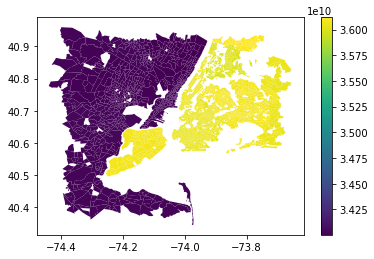

In [40]:
X_four_temp = gpd.GeoDataFrame(X_foursquare)
figure, ax = plt.subplots()
X_four_temp.plot(column='GEOID',legend = True, ax=ax)

In [71]:
binary6typ

'Ongoing_adv_gent'

In [41]:
X_foursquare_beforedrops = X_foursquare.copy()


In [42]:
### Preprocessing Data

y = X_foursquare[binary6typ]
X_foursquare = X_foursquare.drop(typologies+['GEOID','geometry'],axis =1).copy()
print(X_foursquare.shape)
X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(2702, 1458)
(2702, 1458)


In [43]:
X_foursquare.columns

Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=1458)

In [44]:
# Normalize

min_max_scaler = MinMaxScaler()

models = ['Raw','Scaled','Minmaxed']
Xdata_scaled = preprocessing.scale(X_foursquare)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_foursquare)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['Raw'] = X_foursquare
dictx['Scaled'] = Xdata_scaled
dictx['Minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}
imp_dict = {}
names_dict ={}
model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
    imp_dict[m] = {}
    names_dict[m] = {}
resultset=X_foursquare_beforedrops.copy()

In [46]:
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(1891, 1458) (811, 1458) (1891,) (811,)
(1891, 1458) (811, 1458) (1891,) (811,)
(1891, 1458) (811, 1458) (1891,) (811,)


In [47]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()

# LR

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 1458)


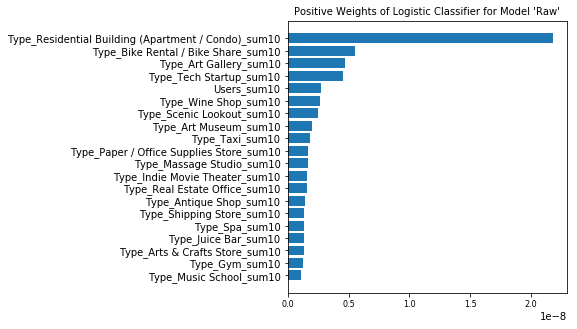

(1, 1458)


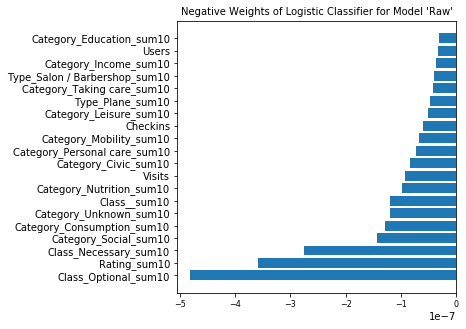

(1, 1458)


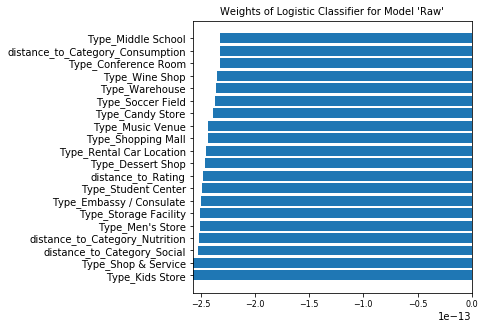

(1, 1458)


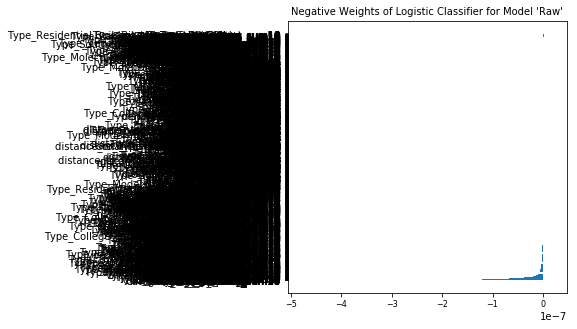

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 1458)


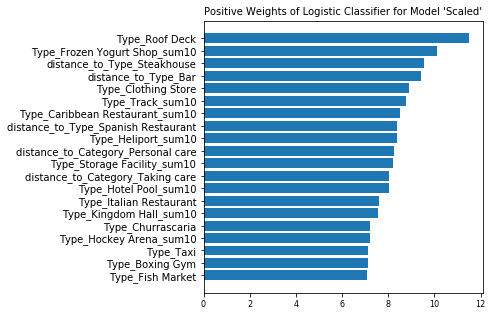

(1, 1458)


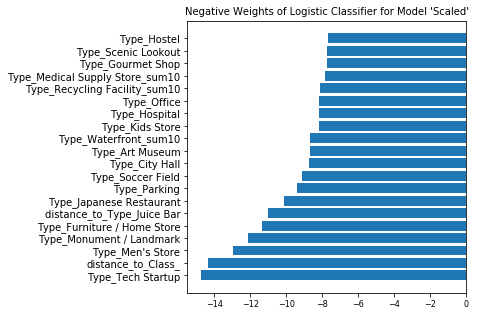

(1, 1458)


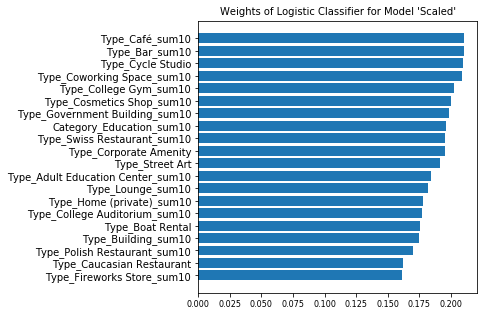

(1, 1458)


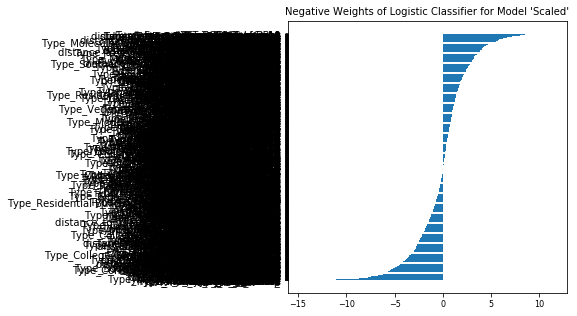

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 1458)


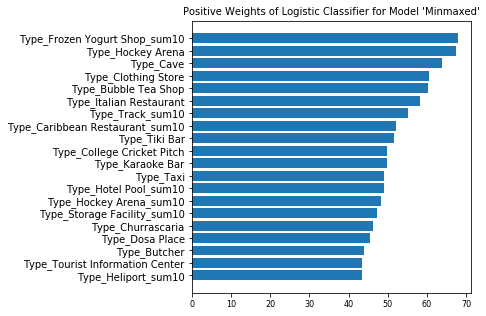

(1, 1458)


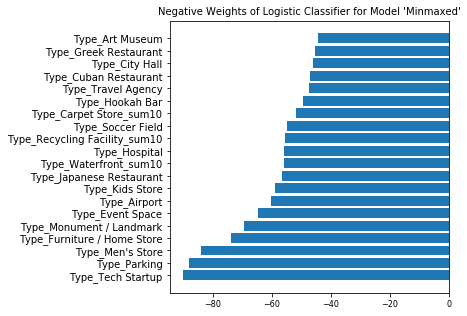

(1, 1458)


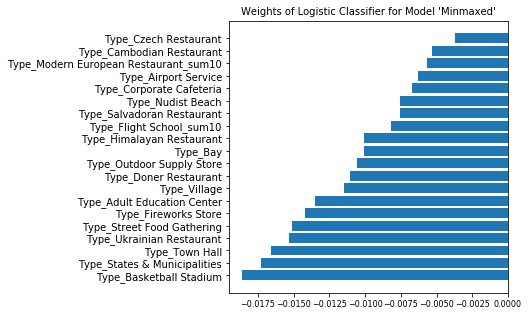

(1, 1458)


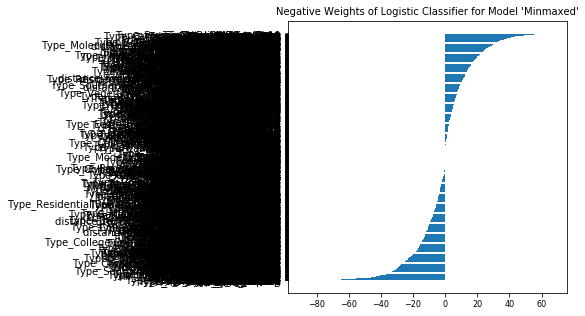

,Minmaxed,Raw,Scaled
Logit,"(-90.2234653477, -88.1984587521, -84.034988841...","(-4.80711726003e-07, -3.58852024632e-07, -2.74...","(-14.7626542726, -14.3576468893, -12.979084835..."


In [48]:
## Logistic Reeg
imp = {}
for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]

    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
#     resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['Logit'] = names
    imp_dict[m]['Logit'] =  imp3
    f_importances_all(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
model_f1_scores
pd.DataFrame(imp_dict)

In [49]:
def featureImportancePlot_dt(rf, labels,m):
    importances = rf.feature_importances_[:]
    indices = np.argsort(importances)[::-1]
    #std = np.std([tree.feature_importances_ for tree in rf.estimators_],
    #         axis=0)
    pl.figure(figsize=(5,5))
    pl.title("Feature importances")
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", #yerr=std[indices]
           align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()
     
    return rf.feature_importances_[indices], np.array(labels)[indices]

# DT

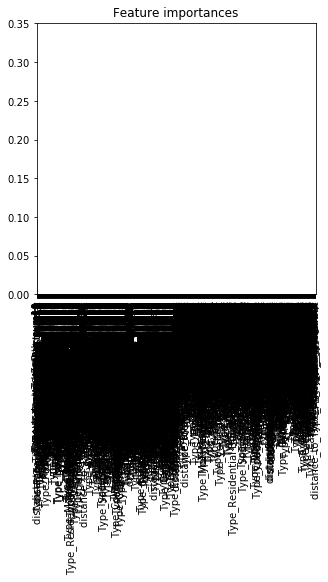

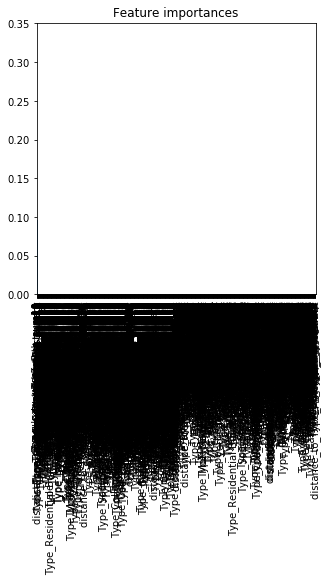

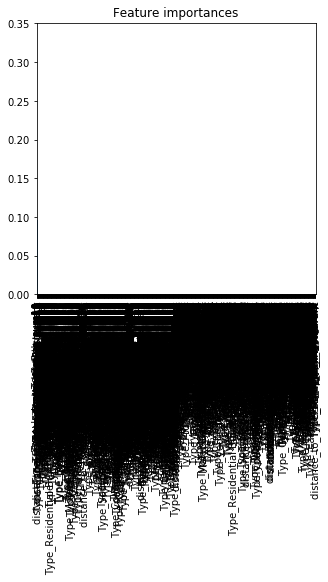

{'Minmaxed': {'DT': 0.23448275862068968, 'Logit': 0.28044280442804426},
 'Raw': {'DT': 0.22222222222222221, 'Logit': 0.0},
 'Scaled': {'DT': 0.22222222222222221, 'Logit': 0.2848101265822785}}

In [50]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
#     param_grid = {'n_estimators':range(1,11),'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
#     dt=DecisionTreeClassifier()
#     gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
#     ds=gr.fit(X_train[m],y_train[m])

    for c in range(5):
#         print (ds.best_params_,ds.best_params_['max_depth'],ds.best_params_['max_leaf_nodes'])
        dt=DecisionTreeClassifier()
        dt = DecisionTreeClassifier(max_depth=3)
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
#     resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['DT'], names_dict[m]['DT'] =  featureImportancePlot_dt(dt, X_foursquare.columns,m)
model_f1_scores

In [51]:
model_f1_scores['Raw']['DT']

0.22222222222222221

In [52]:
resultset['actualtyp']=y

# Random Forest

In [53]:


def featureImportancePlot(rf, labels,m):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    importances_10 = rf.feature_importances_
    indices_10 = np.argsort(importances_10)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure(figsize=(5,5))
    pl.title("Feature importances of Random Forest for Model "+m)
    pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
       color="SteelBlue", yerr=std[indices_10], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices_10], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()
    return rf.feature_importances_[indices], np.array(labels)[indices]

Raw


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 7, 'max_depth': 3, 'n_estimators': 7} 3 7
{'max_leaf_nodes': 7, 'max_depth': 3, 'n_estimators': 7} 3 7
{'max_leaf_nodes': 7, 'max_depth': 3, 'n_estimators': 7} 3 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 7, 'max_depth': 3, 'n_estimators': 7} 3 7
{'max_leaf_nodes': 7, 'max_depth': 3, 'n_estimators': 7} 3 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


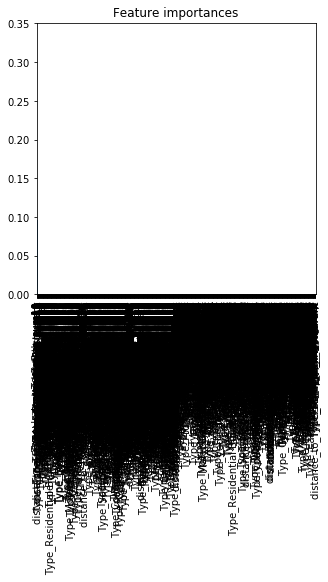

Scaled


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 5, 'max_depth': 5, 'n_estimators': 9} 5 5
{'max_leaf_nodes': 5, 'max_depth': 5, 'n_estimators': 9} 5 5
{'max_leaf_nodes': 5, 'max_depth': 5, 'n_estimators': 9} 5 5
{'max_leaf_nodes': 5, 'max_depth': 5, 'n_estimators': 9} 5 5


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 5, 'max_depth': 5, 'n_estimators': 9} 5 5


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


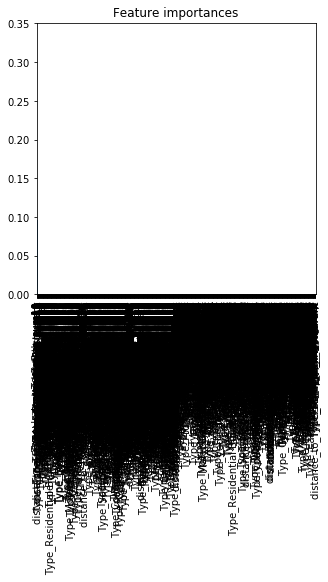

Minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 7, 'max_depth': 10, 'n_estimators': 10} 10 7
{'max_leaf_nodes': 7, 'max_depth': 10, 'n_estimators': 10} 10 7
{'max_leaf_nodes': 7, 'max_depth': 10, 'n_estimators': 10} 10 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'max_leaf_nodes': 7, 'max_depth': 10, 'n_estimators': 10} 10 7
{'max_leaf_nodes': 7, 'max_depth': 10, 'n_estimators': 10} 10 7


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


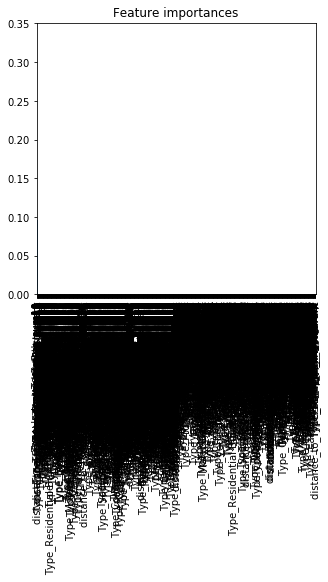

{'Minmaxed': {'DT': 0.23448275862068968,
  'Logit': 0.28044280442804426,
  'RF': 0.034782608695652174},
 'Raw': {'DT': 0.22222222222222221, 'Logit': 0.0, 'RF': 0.0},
 'Scaled': {'DT': 0.22222222222222221, 'Logit': 0.2848101265822785, 'RF': 0.0}}

In [54]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
    rs=gr.fit(X_train[m],y_train[m])
    OS = []
    for c in range(5):
        print(rs.best_params_,rs.best_params_['max_depth'],rs.best_params_['max_leaf_nodes'])
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['RF'], names_dict[m]['RF'] =  featureImportancePlot_dt(dt, X_foursquare.columns,m)
model_f1_scores

#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [55]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()



0.860665844636
0.860665844636
(1, 1458)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


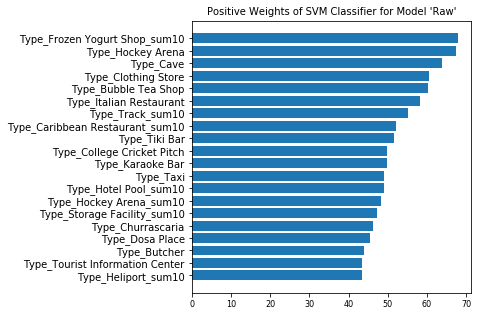

(1, 1458)


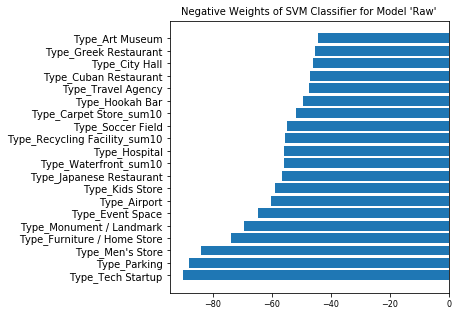

(1, 1458)


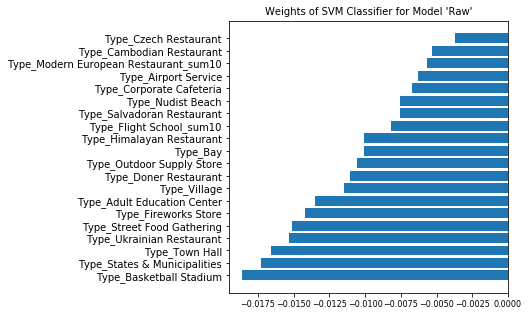

0.861898890259
0.861898890259
(1, 1458)


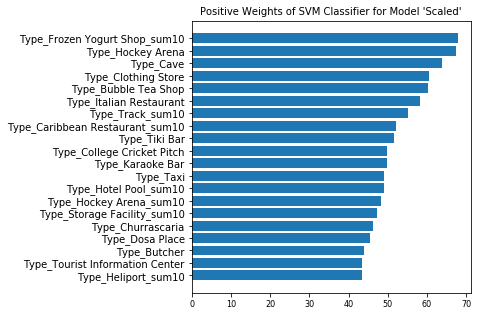

(1, 1458)


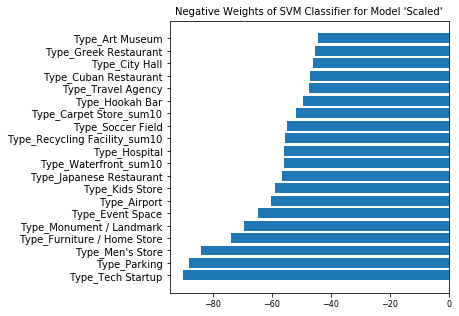

(1, 1458)


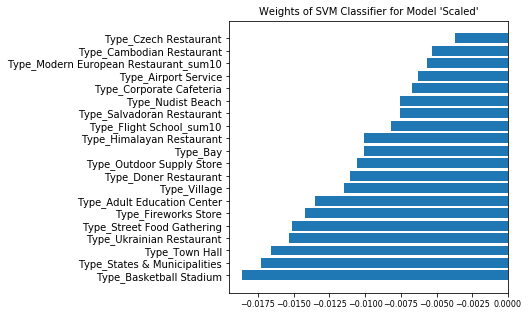

0.860665844636
0.860665844636
(1, 1458)


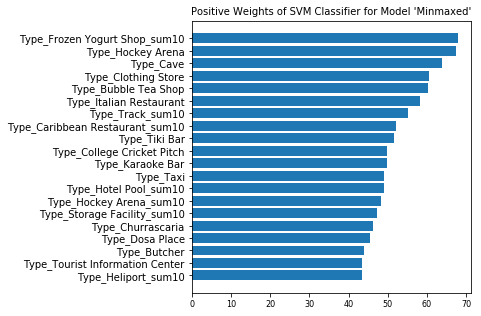

(1, 1458)


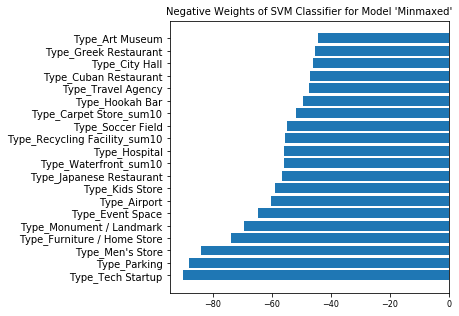

(1, 1458)


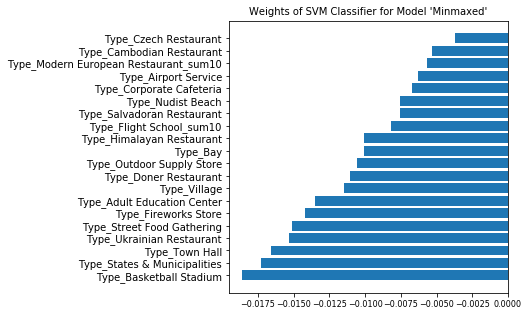

{'Minmaxed': {'DT': 0.23448275862068968,
  'Logit': 0.28044280442804426,
  'RF': 0.034782608695652174,
  'SVM': 0.034782608695652174},
 'Raw': {'DT': 0.22222222222222221, 'Logit': 0.0, 'RF': 0.0, 'SVM': 0.0},
 'Scaled': {'DT': 0.22222222222222221,
  'Logit': 0.2848101265822785,
  'RF': 0.0,
  'SVM': 0.033333333333333326}}

In [56]:

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
#     resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['SVM'] = names
    imp_dict[m]['SVM'] = imp3 
model_f1_scores

# Summary of Results

In [57]:
X_foursquare.columns

Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=1458)

In [58]:
X_foursquare.shape

(2702, 1458)

In [74]:
binary6typ


'Ongoing_adv_gent'

In [59]:
df1 = pd.DataFrame(model_f1_scores)
df2 = pd.DataFrame(model_recall_scores)
df3 =pd.DataFrame(model_precision_scores)
result = pd.concat([df1, df2,df3], axis=1, sort=False)
result

,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled
DT,0.234483,0.222222,0.222222,0.150442,0.141593,0.141593,0.531250,0.516129,0.516129
Logit,0.280443,0.000000,0.284810,0.336283,0.000000,0.398230,0.240506,0.000000,0.221675
RF,0.034783,0.000000,0.000000,0.017699,0.000000,0.000000,1.000000,0.000000,0.000000
SVM,0.034783,0.000000,0.033333,0.017699,0.000000,0.017699,1.000000,0.000000,0.285714


In [60]:
result.to_csv('./Results/Scores'+model_name+'.csv')


In [61]:
names_pd = pd.DataFrame()
counter = {}
for m in models:
    print(m)
    for standarized in modelslist:
        for i, weights in enumerate(names_dict[m][standarized]):
            standarized_m = str(standarized)+'_'+str(m)
            names_pd.loc[standarized_m,weights] = imp_dict[m][standarized][i]


Raw
Scaled
Minmaxed


In [62]:
names_pd.loc['DT_Raw'].idxmax()

'Type_Industrial Estate_sum10'

In [63]:
names_pd.to_csv('./Results/'+model_name+'.csv')
names_pd

,Class_Optional_sum10,Rating_sum10,Class_Necessary_sum10,Category_Social_sum10,Category_Consumption_sum10,Category_Unknown_sum10,Class__sum10,Category_Nutrition_sum10,Visits,Category_Civic_sum10,...,Type_Paper / Office Supplies Store_sum10,Type_Taxi_sum10,Type_Art Museum_sum10,Type_Scenic Lookout_sum10,Type_Wine Shop_sum10,Users_sum10,Type_Tech Startup_sum10,Type_Art Gallery_sum10,Type_Bike Rental / Bike Share_sum10,Type_Residential Building (Apartment / Condo)_sum10
Logit_Raw,-4.807117e-07,-3.588520e-07,-2.747933e-07,-1.432407e-07,-1.295415e-07,-1.203646e-07,-1.203646e-07,-9.756742e-08,-9.244265e-08,-8.299777e-08,...,1.672745e-09,1.813995e-09,1.985901e-09,2.491549e-09,2.660211e-09,2.732266e-09,4.563999e-09,4.674079e-09,5.501552e-09,2.182287e-08
DT_Raw,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RF_Raw,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SVM_Raw,7.784659e-01,1.908085e+00,2.298621e+00,8.529486e-02,2.842845e+00,-2.079434e+00,-2.079434e+00,1.727063e+00,6.462328e+00,-1.703463e-01,...,-2.033764e-01,-2.966875e+00,7.438116e-01,8.007776e-01,2.550507e+00,2.427465e+00,2.665140e+00,6.009807e+00,3.848758e-01,-5.193728e+00
Logit_Scaled,6.212631e-02,2.708203e-01,3.276528e-01,-4.240929e-03,3.277254e-01,-4.143076e-01,-4.143076e-01,2.596765e-01,2.294233e+00,-1.706455e-01,...,-2.892955e-01,-5.637918e-01,2.985528e-01,1.068024e-01,-7.198122e-02,3.244130e-01,5.300210e-01,1.218314e+00,3.046253e-01,-7.626159e-01
DT_Scaled,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
RF_Scaled,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SVM_Scaled,7.784659e-01,1.908085e+00,2.298621e+00,8.529486e-02,2.842845e+00,-2.079434e+00,-2.079434e+00,1.727063e+00,6.462328e+00,-1.703463e-01,...,-2.033764e-01,-2.966875e+00,7.438116e-01,8.007776e-01,2.550507e+00,2.427465e+00,2.665140e+00,6.009807e+00,3.848758e-01,-5.193728e+00
Logit_Minmaxed,7.784659e-01,1.908085e+00,2.298621e+00,8.529486e-02,2.842845e+00,-2.079434e+00,-2.079434e+00,1.727063e+00,6.462328e+00,-1.703463e-01,...,-2.033764e-01,-2.966875e+00,7.438116e-01,8.007776e-01,2.550507e+00,2.427465e+00,2.665140e+00,6.009807e+00,3.848758e-01,-5.193728e+00
DT_Minmaxed,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


- You can refer to https://github.com/mv1742/updny_2

## Results Analysis

In [64]:
print(m)
resultset.columns

Minmaxed


Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'pct_ch_medhval00_16_binary', 'pct_ch_medrent00_16_binary',
       'Ongoing_adv_gent', 'gent00_16', 'gent90_00', 'Supergent16',
       'actualtyp', 'Raw_RF_predicttyp', 'Scaled_RF_predicttyp',
       'Minmaxed_RF_predicttyp'],
      dtype='object', length=1473)

The plots below show the number of positive (gentrifying, 1) and negative (not-gentrifying, 0) typologies based on the actual typology labels and the predicted labels from each model.

0.0    2335
1.0     367
Name: actualtyp, dtype: int64

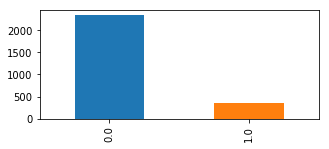

In [65]:
resultset['actualtyp'].value_counts().plot(kind='bar', figsize=(5,2))
resultset['actualtyp'].value_counts()

In [66]:
modelslist

['Logit', 'DT', 'RF', 'SVM']

In [68]:
# for m in models:
#     for i in modelslist:
#         resultset[m+'_'+i+'_predicttyp'].value_counts().plot(kind='bar',figsize=(5,2))
#         plt.show()
#         print(resultset[m+'_'+i+'_predicttyp'].value_counts())

Note that all of the predicted results for the decision tree model are 0 (non-gentrifgying). The confusion matrix below shows [[TN, FP][FN, TP]]-- you can see that all of the results are negative

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(resultset.actualtyp, resultset.scaled_Logit_predicttyp)


In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

Below you can see that logit produces 30 positive results (19 true and 11 false), while random forest produces only 1 positive (it is true).

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_RF_predicttyp)

In [ ]:
perf_measure(resultset.actualtyp, resultset.o_SVM_predicttyp)

In [ ]:
resultsfull=data_sjoined_sum_merged.merge(resultset[["scaled_Logit_predicttyp"]], right_index=True, left_index=True)

In [ ]:
resultsfull.head()

In [ ]:
def set_resulttyp(row):
    if row["actualtyp"] == 0:
        if row["scaled_Logit_predicttyp"] == 0:
            return "TN"
        elif row["scaled_Logit_predicttyp"] == 1: 
            return "FP" 
    elif row["actualtyp"] == 1:
        if row["scaled_Logit_predicttyp"] == 1:
            return "TP"
        elif  row["scaled_Logit_predicttyp"] == 0:
            return "FN"

#df = df.assign(color=df.apply(set_color, axis=1))

In [ ]:
resultsfinal=resultsfull.assign(scaled_Logit_restultyp=resultset.apply(set_resulttyp, axis=1))

In [ ]:
f, ax = plt.subplots(figsize=(16,16))
resultsfinal.plot(column='scaled_Logit_restultyp', ax=ax, legend=True)

The only positive results for the logit model (whether true or false positive) fell in the NYC and Jersey City areas-- no outer borough or other NJ/CT/NY tracts were picked up. 